In [24]:
import numpy
from numpy.random import binomial, multinomial

def relprob(l): return [float(x)/sum(l) for x in l]

def evolve_next_generation(state, N, skew):
    x1y1, x1y2, x2y1, x2y2, x1x1, x1x2, x2x1, x2x2 = state
    
    # sample one gamete from each individual to new gamete pool
    x1y1_x1, x1y1_y1 = multinomial(x1y1, [0.5, 0.5])
    x2y1_x2, x2y1_y1 = multinomial(x2y1, [0.5+skew, 0.5-skew])
    x1y2_x1, x1y2_y2 = multinomial(x1y2, [0.5, 0.5])
    x2y2_x2, x2y2_y2 = multinomial(x2y2, [0.5, 0.5])

    x1x1_x1          = x1x1
    x2x1_x2, x2x1_x1 = multinomial(x2x1, [0.5, 0.5])
    x1x2_x1, x1x2_x2 = multinomial(x1x2, [0.5, 0.5])
    x2x2_x2          = x2x2
    
    male_x1 = (x1y1_x1 + x1y2_x1) / (2.*N)
    male_x2 = (x2y1_x2 + x2y2_x2) / (2.*N)
    male_y1 = (x1y1_y1 + x2y1_y1) / (2.*N)
    male_y2 = (x1y2_y2 + x2y2_y2) / (2.*N)
    female_x1 = (x1x1_x1 + x2x1_x1 + x1x2_x1) / (2.*N)
    female_x2 = (x2x2_x2 + x2x1_x2 + x1x2_x2) / (2.*N)
    
    # sample N males
    x1y1, x1y2, x2y1, x2y2 = multinomial(N, relprob([female_x1*male_y1, female_x1*male_y2, female_x2*male_y1, female_x2*male_y2]))
    
    # sample N females
    x1x1, x1x2, x2x1, x2x2 = multinomial(N, relprob([female_x1*male_x1, female_x1*male_x2, female_x2*male_x1, female_x2*male_x2]))
    
    return x1y1, x1y2, x2y1, x2y2, x1x1, x1x2, x2x1, x2x2

[8991.0, 999.0, 9.0, 1.0, 9980.01, 9.99, 9.99, 0.01]


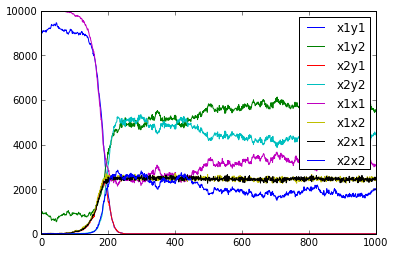

In [27]:
import numpy
no_gen = 1000
N = 10000
skew = 0.1

x1, x2, y1, y2 = 0.999, 0.001, 0.9, 0.1

genotype_counts = [N * p for p in [x1*y1, x1*y2, x2*y1, x2*y2, x1*x1, x1*x2, x2*x1, x2*x2]]
print genotype_counts
dynamic_system = numpy.empty( (8, no_gen) )
dynamic_system[:,0] = genotype_counts
for i in range(1,no_gen):
    dynamic_system[:,i] = evolve_next_generation(dynamic_system[:,i-1], N, skew)
    
from pylab import *
plot(dynamic_system[0,], label='x1y1')
plot(dynamic_system[1,], label='x1y2')
plot(dynamic_system[2,], label='x2y1')
plot(dynamic_system[3,], label='x2y2')
plot(dynamic_system[4,], label='x1x1')
plot(dynamic_system[5,], label='x1x2')
plot(dynamic_system[6,], label='x2x1')
plot(dynamic_system[7,], label='x2x2')
legend()

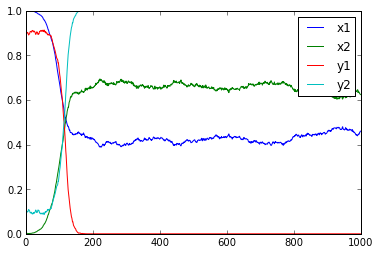

In [26]:
plot(sum(dynamic_system[x,] for x in (0, 1, 4, 4, 5, 6))/(3.*N), label='x1')
plot(sum(dynamic_system[x,] for x in (2, 3, 3, 5, 6, 7))/(3.*N), label='x2')
plot(sum(dynamic_system[x,] for x in (0, 2))/(N), label='y1')
plot(sum(dynamic_system[x,] for x in (1, 3))/(N), label='y2')
legend()